## Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from dateutil.relativedelta import relativedelta

## To Ignore warnings due to version problem

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading loan.csv file and check it's features

In [3]:
# read csv
loan = pd.read_csv('loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
print('Shape: /n')
print(loan.shape)
print('\n')
print(loan.info())
print('\n')
print(loan.dtypes)
print('\n')

Shape: /n
(39717, 111)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object




#  Removing Null Columns

### Checking for Null Value Columns

In [5]:
# Making dataframe that contains count of null values corresponding to each column

Null_counts_df = loan.isnull().sum().to_frame()
print(Null_counts_df)

                                0
id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
...                           ...
tax_liens                      39
tot_hi_cred_lim             39717
total_bal_ex_mort           39717
total_bc_limit              39717
total_il_high_credit_limit  39717

[111 rows x 1 columns]


In [6]:
# Making dataframe that contains percentage of null values corresponding to each column

Null_count_percent_df = round(Null_counts_df[0]/len(loan)*100, 1).to_frame()
print(Null_count_percent_df)

                                0
id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
...                           ...
tax_liens                     0.1
tot_hi_cred_lim             100.0
total_bal_ex_mort           100.0
total_bc_limit              100.0
total_il_high_credit_limit  100.0

[111 rows x 1 columns]


In [7]:
# columns that have more than 50% null values, those columns are not usefull for analysis

Null_col_list = Null_count_percent_df[(Null_count_percent_df[0]> 50)].index.to_list()
print("Null Column list:")
print(Null_col_list)
print("\n\nTotal Number of Null Columns:")
print(len(Null_col_list))

Null Column list:
['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt

In [8]:
#shape of loan data before dropping Null Value cols
print("Shape of loan data before dropping Null Value cols:")
print(loan.shape)
print('\n')

# Dropping null columns
loan.drop(Null_col_list, axis =1, inplace=True)

# Checking shape of dataset after removal of null columns
print("Shape of loan data after dropping Null Value cols:")
print(loan.shape)

Shape of loan data before dropping Null Value cols:
(39717, 111)


Shape of loan data after dropping Null Value cols:
(39717, 54)


In [9]:
# Again checking for null values
print(loan.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [10]:
# Checking for 'desc' col, cause it having so much null values
print(loan.desc)

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object


In [11]:
# dropping 'desc' col as it won't help us in our analysis

# shape of loan data before dropping 'desc' col
print("Shape of loan data before dropping decs col:")
print(loan.shape)
print('\n')

# Dropping 'desc' column
loan.drop('desc', axis =1, inplace=True)

# shape of loan data after dropping 'desc' col
print("Shape of loan data after dropping decs col::")
print(loan.shape)

Shape of loan data before dropping decs col:
(39717, 54)


Shape of loan data after dropping decs col::
(39717, 53)


### Removing Columns which have same value in each row

In [12]:
# Checking unique values in each columns 
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [13]:
# filtering cols which have only 1 unique value, cause those column won't contribute anything in our analysis.
Single_value_cols =  loan.nunique()[loan.nunique() == 1].index.to_list()
print("Single value columns list:\n")
print(Single_value_cols)

Single value columns list:

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [14]:
# Dropping single value type columns, cause these column won't help us in our analysis

# shape of loan data before dropping Single value columns
print("Shape of loan data before dropping Single value columns:")
print(loan.shape)
print('\n')

# Dropping single value type columns
loan.drop(Single_value_cols, axis =1, inplace=True)

# shape of loan data after dropping Single value columns
print("Shape of loan data after dropping Single value columns:")
print(loan.shape)

Shape of loan data before dropping Single value columns:
(39717, 53)


Shape of loan data after dropping Single value columns:
(39717, 44)


# Dealing with Dates

In [15]:
# Checking for columns having dates
loan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal           

In [16]:
# observing all columns we found  'issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'term' and 'earliest_cr_line' should be treated with datetime moudle

### Dealing with 'issue_d' column

In [17]:
# checking 'issue_d' col
print(loan.issue_d)

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object


In [18]:
# converting 'issue_d' col  to datetime object
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
print(loan.issue_d)

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]


### Dealing with 'last_pymnt_d' column

In [19]:
# checking 'last_pymnt_d' col
print(loan.last_pymnt_d)

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
4        May-16
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 39717, dtype: object


In [20]:
# converting 'last_pymnt_d' col  to datetime object
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
print(loan.last_pymnt_d)

0       2015-01-01
1       2013-04-01
2       2014-06-01
3       2015-01-01
4       2016-05-01
           ...    
39712   2010-07-01
39713   2010-07-01
39714   2008-04-01
39715   2008-01-01
39716   2010-06-01
Name: last_pymnt_d, Length: 39717, dtype: datetime64[ns]


### Dealing with 'last_credit_pull_d' column

In [21]:
# checking 'last_credit_pull_d' col
print(loan.last_credit_pull_d)

0        May-16
1        Sep-13
2        May-16
3        Apr-16
4        May-16
          ...  
39712    Jun-10
39713    Jul-10
39714    Jun-07
39715    Jun-07
39716    Jun-10
Name: last_credit_pull_d, Length: 39717, dtype: object


In [22]:
# converting 'last_credit_pull_d' col  to datetime object
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')
print(loan.last_credit_pull_d)

0       2016-05-01
1       2013-09-01
2       2016-05-01
3       2016-04-01
4       2016-05-01
           ...    
39712   2010-06-01
39713   2010-07-01
39714   2007-06-01
39715   2007-06-01
39716   2010-06-01
Name: last_credit_pull_d, Length: 39717, dtype: datetime64[ns]


### Dealing with 'term' column

In [23]:
#checking loan term
loan.term

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 39717, dtype: object

In [24]:
# Removing months form 'term'
loan.term = loan.term.str.rstrip(' months')
print(loan.term)

0         36
1         60
2         36
3         36
4         60
        ... 
39712     36
39713     36
39714     36
39715     36
39716     36
Name: term, Length: 39717, dtype: object


In [25]:
# converting loan.term to interger value
loan.term = loan.term.astype(int)
print(loan.term)

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int32


### Dealing with 'earliest_cr_line' column

In [26]:
# checking 'last_credit_pull_d' col
print(loan.earliest_cr_line)

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Jan-96
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 39717, dtype: object


In [27]:
# converting 'last_credit_pull_d' col  to datetime object
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
print(loan.earliest_cr_line)

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
4       1996-01-01
           ...    
39712   1990-11-01
39713   1986-12-01
39714   1998-10-01
39715   1988-11-01
39716   2003-10-01
Name: earliest_cr_line, Length: 39717, dtype: datetime64[ns]


# Dealing with null Values

In [28]:
# Checking null values in each column
no_of_null = loan.isnull().sum()
print(no_of_null)

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prnc

In [29]:
# Filtering columns to be dealt with null values
no_of_null[no_of_null > 0]

emp_title               2459
emp_length              1075
title                     11
revol_util                50
last_pymnt_d              71
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [30]:
# Plenty of funtions do not apply on columns which have null values in it. 
# These columns may play important role in our analysis so we have to fill them with suitable values


### Dealing with 'emp_title' null values

In [31]:
# check 'emp_title'
loan.emp_title.value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [32]:
# It is better to fill NA values with 'Not availible', cause assigning any value can effect our analysis. 
loan.emp_title.fillna('N/A', inplace = True)

In [33]:
# verify for null values
loan.emp_title.isnull().sum()

0

### Dealing with 'emp_length' null values

In [34]:
# check 'emp_length'
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [35]:
# After looking the types of value in this column, it is risky to fill anything in NA values
# So keeping this as it is

### Dealing with 'title' null values

In [36]:
# check 'title'
loan.title.value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [37]:
# After looking the types of value in this column, we feel NA values of this column can be filled with frequent occuring value.
Mode_of_title = loan.title.mode()[0]
print("Most frequent title is:")
print(Mode_of_title)

loan.title.fillna(Mode_of_title, inplace = True)

Most frequent title is:
Debt Consolidation


In [38]:
# verify for null values
loan.title.isnull().sum()

0

### Dealing with 'revol_util' null values

In [39]:
# check 'title'
loan.revol_util.value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

In [40]:
Mode_of_revol_util = loan.revol_util.mode()[0]
print("Most frequent revol_util is:")
print(Mode_of_revol_util)

loan.revol_util.fillna(Mode_of_revol_util, inplace = True)

Most frequent revol_util is:
0%


In [41]:
loan.revol_util.isnull().sum()

0

### Dealing with 'last_pymnt_d' null values

In [42]:
# check 'last_pymnt_d'
loan.last_pymnt_d.isnull().sum()

71

In [43]:
# Making a list of index where last_pymnt_d is a null
last_pymnt_d_null_list = loan.last_pymnt_d[loan.last_pymnt_d.isnull()].index.to_list()
print(last_pymnt_d_null_list)

[26, 2724, 3613, 3985, 4206, 4803, 5716, 6253, 6259, 6768, 6943, 6967, 7137, 8429, 8707, 10175, 11051, 11468, 11523, 11703, 11860, 12026, 12739, 13661, 13891, 13969, 14220, 14642, 14839, 14871, 16301, 16325, 16719, 17913, 18037, 18216, 18316, 18332, 22998, 24469, 24779, 24881, 26775, 27644, 28155, 28547, 28685, 28980, 29635, 30297, 31206, 31359, 32322, 32378, 32545, 32593, 32760, 32967, 33567, 34177, 34217, 34237, 34420, 34438, 35143, 35186, 36185, 36206, 36209, 36937, 37911]


In [44]:
# last payment date can be derived from issue_d + loan term
for i in last_pymnt_d_null_list:
        loan.last_pymnt_d[i] = loan.issue_d[i] + relativedelta(months = loan.term[i])


In [45]:
# verify 'last_pymnt_d' isnull values
loan.last_pymnt_d.isnull().sum()


0

### Dealing with 'last_credit_pull_d' null values

In [46]:
# Checking for null values in last_credit_pull_d
loan.last_credit_pull_d[loan.last_credit_pull_d.isnull()]

26025   NaT
39476   NaT
Name: last_credit_pull_d, dtype: datetime64[ns]

In [47]:
# lets have a look on these entries
loan.iloc[39476,:]

id                                                                    186499
member_id                                                             186347
loan_amnt                                                               1000
funded_amnt                                                             1000
funded_amnt_inv                                                        875.0
term                                                                      36
int_rate                                                               7.12%
installment                                                            30.94
grade                                                                      A
sub_grade                                                                 A1
emp_title                                                                N/A
emp_length                                                          < 1 year
home_ownership                                                      MORTGAGE

In [48]:
# lets have a look on these entries
loan.iloc[26025,:]

id                                                                    575712
member_id                                                             740467
loan_amnt                                                               5000
funded_amnt                                                             5000
funded_amnt_inv                                                       5000.0
term                                                                      36
int_rate                                                              11.12%
installment                                                           163.98
grade                                                                      B
sub_grade                                                                 B3
emp_title                                                                N/A
emp_length                                                           5 years
home_ownership                                                          RENT

In [49]:
# it seems there may be relation ship of last_credit_pull_d with last_pymnt_d
# lets take difference of both dates
Diff = loan.last_credit_pull_d - loan.last_pymnt_d
print(Diff)

0        486 days
1        153 days
2        700 days
3        456 days
4          0 days
           ...   
39712    -30 days
39713      0 days
39714   -305 days
39715   -214 days
39716      0 days
Length: 39717, dtype: timedelta64[ns]


In [50]:
Diff.describe()

count                          39715
mean     514 days 20:07:52.446179024
std      606 days 08:02:22.602140768
min             -1797 days +00:00:00
25%                  0 days 00:00:00
50%                212 days 00:00:00
75%                943 days 00:00:00
max               2953 days 00:00:00
dtype: object

In [51]:
# We got to know that most of the time loan.last_credit_pull_d is 212 days ahead of loan.last_pymnt_d
# so we can fill NA values with this relationship
for i in [39476,26025]:
    loan.last_credit_pull_d[i] = loan.last_pymnt_d[i] + relativedelta(days = 212)

In [52]:
# Lets check the last_credit_pull_d again
loan.last_credit_pull_d.isnull().sum()

0

### Dealing with 'pub_rec_bankruptcies' null values

In [53]:
# Lets check pub_rec_bankruptcies
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [54]:
print("Before cleaning:")
print(loan.pub_rec_bankruptcies.isnull().sum())
print("After cleaning:")
loan.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(loan.pub_rec_bankruptcies.isnull().sum())

Before cleaning:
697
After cleaning:
0


In [55]:
# Now let us see our datasets's null values
loan.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prnc

# Modifying object datatypes

In [56]:
# Checking data types of all columns
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                                int32
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
url                                object
purpose                            object
title                              object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                       

In [57]:
# Checking for object data types of all columns
object_dtypes_col= loan.dtypes[loan.dtypes == 'object']
print(object_dtypes_col)

int_rate                object
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
verification_status     object
loan_status             object
url                     object
purpose                 object
title                   object
zip_code                object
addr_state              object
revol_util              object
pub_rec_bankruptcies    object
dtype: object


In [58]:
### After looking the data type we found following cols to be cleaned as numeric values for our analysis.
# 'int_rate', 'emp_length','earliest_cr_line', 'revol_util'

### Cleaning 'int_rate' column

In [59]:
# checking 'int_rate'
loan.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [60]:
# Removing % form 'int_rate'
loan.int_rate = loan.int_rate.str.rstrip('%')
print(loan.int_rate)

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: object


In [61]:
# converting loan.int_rate to float value
loan.int_rate = loan.int_rate.astype(float)
print(loan.int_rate)

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64


### Cleaning 'emp_length' column

In [62]:
# checking 'emp_length'
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [63]:
# Removing 'year', 'years', +'' form 'emp_length'
loan.emp_length = loan.emp_length.str.rstrip(' years+')
loan.emp_length = loan.emp_length.apply(lambda x : str(0) if x == '< 1' else x)
print(loan.emp_length)

0        10
1         0
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 39717, dtype: object


In [64]:
# converting loan.emp_length to integer value
loan.emp_length = loan.emp_length.astype(int, errors = 'ignore')
print(loan.emp_length)

0        10
1         0
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 39717, dtype: object


### Cleaning 'revol_util' column

In [65]:
# checking 'revol_util'
loan.revol_util

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object

In [66]:
# Removing % form 'revol_util'
loan.revol_util = loan.revol_util.str.rstrip('%')
print(loan.revol_util)

0        83.70
1         9.40
2        98.50
3           21
4        53.90
         ...  
39712    13.10
39713    26.90
39714    19.40
39715     0.70
39716    51.50
Name: revol_util, Length: 39717, dtype: object


In [67]:
# converting loan.revol_util to float value
loan.revol_util = loan.revol_util.astype(float)
print(loan.revol_util)

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 39717, dtype: float64


# Final Cleaned Data

In [68]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0


In [69]:
print('Shape: /n')
print(loan.shape)
print('\n')
print(loan.info())
print('\n')
print(loan.dtypes)
print('\n')

Shape: /n
(39717, 44)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   member_id                39717 non-null  int64         
 2   loan_amnt                39717 non-null  int64         
 3   funded_amnt              39717 non-null  int64         
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  int32         
 6   int_rate                 39717 non-null  float64       
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                39717 non-null  object        
 11  emp_length               38642 non-null  object        
 12  home_own

# Derived Column for analysis

### Issue Year and Issue Month

In [70]:
# Making new columns year and month for year wise and month wise study

loan['issue_year'] = loan['issue_d'].dt.year
loan['issue_month'] = loan['issue_d'].dt.month

loan.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,863.16,0.0,0.0,0.0,2015-01-01,171.62,2016-05-01,0.0,2011,12


## Funded Amount Categories

In [71]:
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan['loan_funded_cats'] = pd.cut(loan['funded_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])
loan['loan_funded_cats']

0            0-7000
1            0-7000
2            0-7000
3        7000-14000
4            0-7000
            ...    
39712        0-7000
39713    7000-14000
39714        0-7000
39715        0-7000
39716    7000-14000
Name: loan_funded_cats, Length: 39717, dtype: category
Categories (5, object): ['0-7000' < '7000-14000' < '14000-21000' < '21000-28000' < '28000 +']

## Annual Income Categories

In [72]:
# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
loan['annual_inc_cats']

0        20000-40000
1        20000-40000
2            0-20000
3        40000-60000
4        60000-80000
            ...     
39712        80000 +
39713        0-20000
39714        80000 +
39715        80000 +
39716    20000-40000
Name: annual_inc_cats, Length: 39717, dtype: category
Categories (5, object): ['0-20000' < '20000-40000' < '40000-60000' < '60000-80000' < '80000 +']

## Annual Income Categories

In [73]:
# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])
loan['int_rate_cats']

0          10-13
1        12.5-16
2        12.5-16
3        12.5-16
4        12.5-16
          ...   
39712       0-10
39713      10-13
39714       0-10
39715       0-10
39716    12.5-16
Name: int_rate_cats, Length: 39717, dtype: category
Categories (4, object): ['0-10' < '10-13' < '12.5-16' < '16 +']

## Interest Rate Categories

In [74]:
# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])
loan['int_rate_cats']

0          10-13
1        12.5-16
2        12.5-16
3        12.5-16
4        12.5-16
          ...   
39712       0-10
39713      10-13
39714       0-10
39715       0-10
39716    12.5-16
Name: int_rate_cats, Length: 39717, dtype: category
Categories (4, object): ['0-10' < '10-13' < '12.5-16' < '16 +']

## Debt to Income Categories

In [75]:
# categorise dti into buckets for bivariate analysis.
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])
loan['dti_cats']

0          NaN
1          0-5
2        05-10
3        15-20
4        15-20
         ...  
39712    10-15
39713    05-10
39714      0-5
39715      0-5
39716    10-15
Name: dti_cats, Length: 39717, dtype: category
Categories (5, object): ['0-5' < '05-10' < '10-15' < '15-20' < '25+']

# Univariate analysis

In [76]:
# Now lets find the column where we can perform univariate analysis

In [77]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month', 'loan_funded_cats',
       'annual_inc_cats', 'int_rate_cats', 'dti_cats'],
      dtype='object')

In [78]:
# Its seems we can do univariate analysis on Loan Status, loan_amnt', 'funded_amnt', 'funded_amnt_inv',
#'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
#'loan_status', 'purpose', 'addr_state', 'issue_year' and 'issue_month' 

## Loan Status

In [79]:
# First and foremost as we know loan_status is our target variable
# let us first calculate most importand Charge Off ratio of loans
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

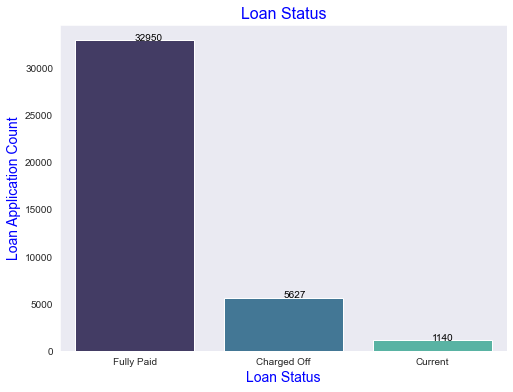

In [80]:
# seeing it in bar chart
plt.figure(figsize=(8,6),facecolor= 'w')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loan,palette='mako')
ax.set_title('Loan Status',fontsize=16,color='b')
ax.set_xlabel('Loan Status',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')            
# To show count of values above bars
s=loan['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

In [81]:
# Calculating percentage for each type
chrg_of_prcnt = round(len(loan.loan_status[loan.loan_status == 'Charged Off'])/ len(loan.loan_status) *100, 2)
fully_paid_prcnt = round(len(loan.loan_status[loan.loan_status == 'Fully Paid'])/ len(loan.loan_status) *100, 2)
current_prcnt = round(len(loan.loan_status[loan.loan_status == 'Current'])/ len(loan.loan_status) *100, 2)
print("Charged off percentage of all loans is : " + str(chrg_of_prcnt) + '%')
print("Fully Paid percentage of all loans is : " + str(fully_paid_prcnt) + '%')
print("Current percentage of all loans is : " + str(current_prcnt) + '%')
pie_values = [chrg_of_prcnt, fully_paid_prcnt, current_prcnt]
pie_labels = ['Charged off', 'Fully Paid', 'Current']

Charged off percentage of all loans is : 14.17%
Fully Paid percentage of all loans is : 82.96%
Current percentage of all loans is : 2.87%


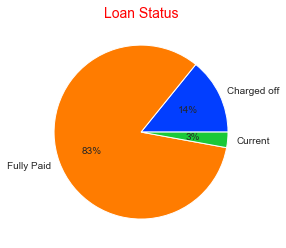

In [82]:
#creating pie chart
plt.pie(pie_values, labels =pie_labels, colors = sns.color_palette('bright')[0:3],  autopct='%.0f%%')
plt.title('Loan Status',fontsize=14,color='r')
plt.show()

### Observations :
#### Plot shows that 14% loans were charged off out of total loan issued.

## Loan Amount, Funded Amount and Funded Amount Inv.

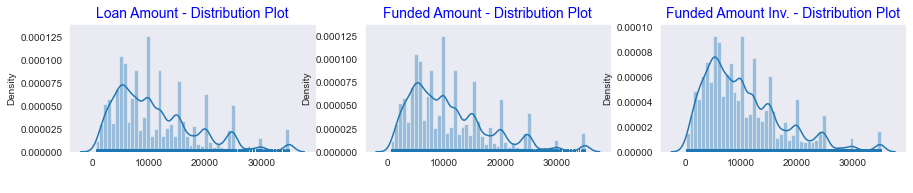

In [83]:
# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(3, 3, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(3, 3, 2)
ax = sns.distplot(loan['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(3, 3, 3)
ax = sns.distplot(loan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

### Observation: 
#### Distribution of amounts for all three looks very much similar.
#### We will work with only Funded Amount column for rest of our analysis. As it is actual amount went out from 

## Funded Amount Distribution

In [84]:
# Basic statistics with .describe() - Quantitative Variables
loan['funded_amnt'].describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

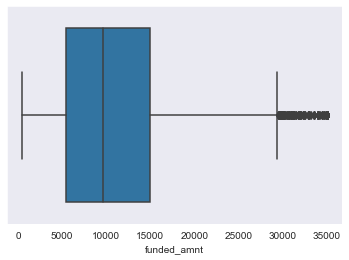

In [85]:
sns.boxplot(loan.funded_amnt)
plt.show()

### Obseravtion: 
#### Majority of loans funded are between 5400 to 15000 (IQR)
#### Minimum funded amount is 500
#### Maximum funded amount is 35000

## Interest Rate Distribution

In [86]:
# Basic statistics with .describe() - Quantitative Variables
loan.int_rate.describe()


count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

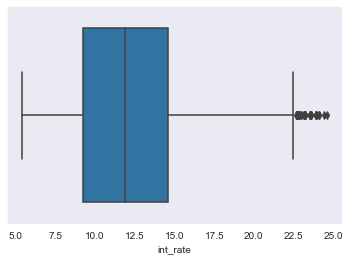

In [87]:
sns.boxplot(loan.int_rate)
plt.show()

### Obseravtion: 
#### Majority of loans given at interest rate from between 9.25 to 14.59 (IQR)
#### Minimum interest rate is 5.42
#### Maximum interest rate is 24.59

## Distribution of Loan Term given to  borrower

In [88]:
loan.term.describe()

count    39717.000000
mean        42.418007
std         10.622815
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

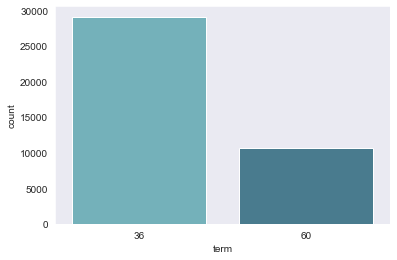

In [89]:
sns.countplot(x="term", data=loan,palette='GnBu_d')
plt.show()

### Obseravtion: 
#### Majority of loans given for 30 months

## Distribution of Loan Grade

In [90]:
# Check for value counts
loan.grade.value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

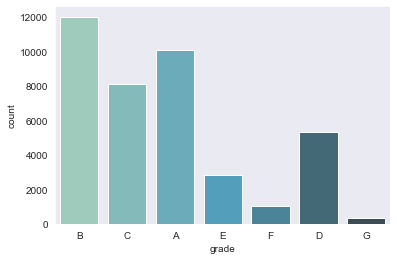

In [91]:
sns.countplot(x="grade", data=loan,palette='GnBu_d')
plt.show()

### Obseravtion: 
#### Majority of loans given are B grade loans

## Distribution of Employee Length

In [92]:
# Check for value counts
loan.emp_length.value_counts()

10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

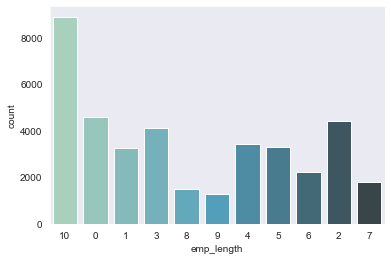

In [93]:
sns.countplot(x="emp_length", data=loan,palette='GnBu_d')
plt.show()

### Obseravtion: 
#### Majority of loans given to employee who have been working for 10 or more than 10 years

## Distribution of Home Ownership

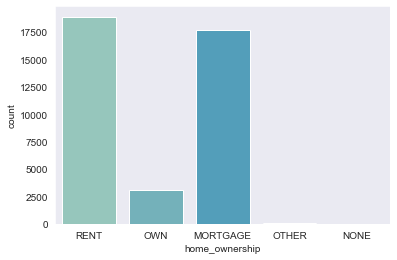

In [94]:
sns.countplot(x="home_ownership",data=loan, palette='GnBu_d')
plt.show()

### Obseravtion: 
#### Majority of loans given to persons whoes home ownership status is etiher Rent or Mortgage

## Distribution of Annual Income

In [95]:
loan.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

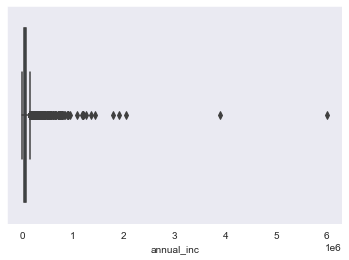

In [96]:
sns.boxplot(loan.annual_inc)
plt.show()

In [97]:
# it seems annual income column has outlier, We should remove these to get better anlaysis.

# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(loan["annual_inc"].describe())

# Now below data looks much better. Lets plot later and find some conclusions

After Removal of Outliers :
count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64


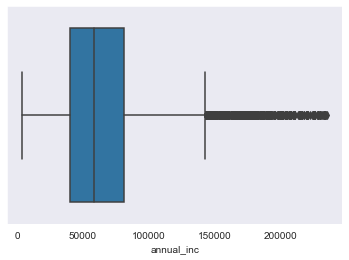

In [98]:
sns.boxplot(loan.annual_inc)
plt.show()

### Observations :
#### Plot shows that majority of people who applied for loan have income between 40000 to 81000. (IQR)

## Distribution of Purpose of loan

In [99]:
# Checking all the puposes
loan.purpose.value_counts()

debt_consolidation    18497
credit_card            5089
other                  3958
home_improvement       2894
major_purchase         2166
small_business         1797
car                    1542
wedding                 937
medical                 686
moving                  577
vacation                381
house                   371
educational             323
renewable_energy        101
Name: purpose, dtype: int64

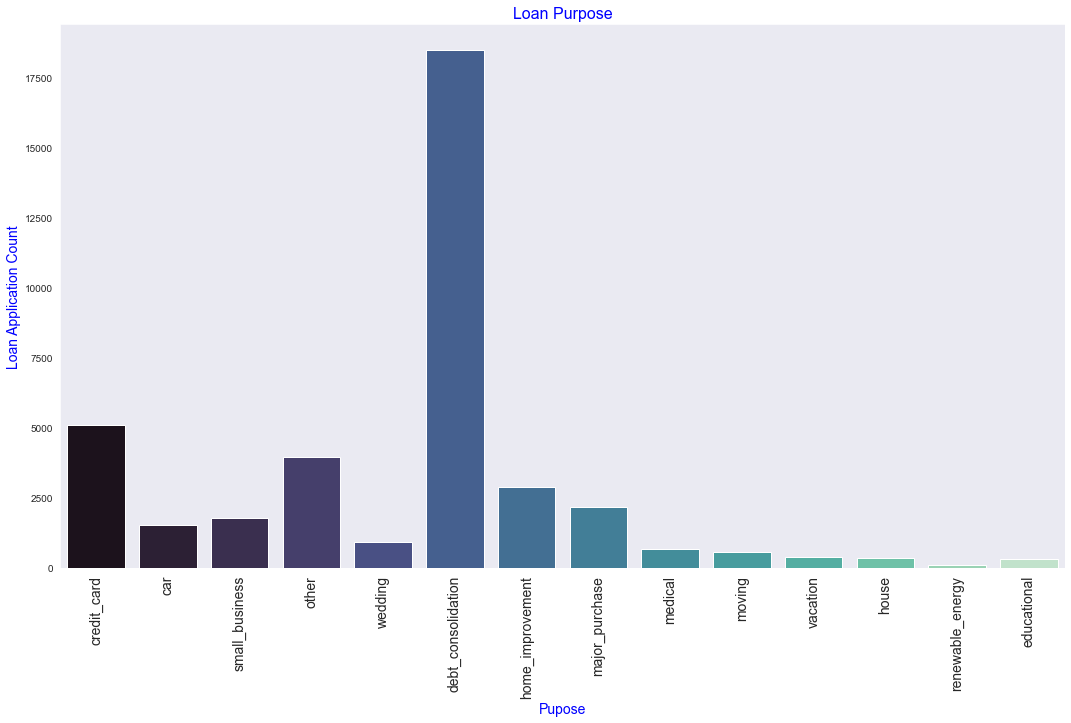

In [100]:
plt.figure(figsize=(18,10),facecolor= 'w')
sns.set_style("dark")
ax = sns.countplot(x="purpose",data=loan,palette='mako')
ax.set_title('Loan Purpose',fontsize=16,color='b')
ax.set_xlabel('Pupose',fontsize=14,color = 'b')
plt.xticks(rotation=90, fontsize = 14) 
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')            
plt.show()

### Observations :
#### Plot shows that majority of loan taken to debt consolidation.
#### After that loan taken for credit card bills

## Distribution of Purpose of loan in all states

In [101]:
# Checking list of states
loan['addr_state'].value_counts()

CA    7032
NY    3755
FL    2834
TX    2694
NJ    1826
PA    1508
IL    1505
VA    1396
GA    1388
MA    1321
OH    1217
MD    1036
AZ     869
WA     833
CO     782
NC     781
CT     736
MI     714
MO     681
MN     613
NV     492
SC     468
WI     459
OR     451
AL     449
LA     429
KY     324
OK     298
KS     271
UT     257
AR     245
DC     214
RI     194
NM     184
WV     177
HI     174
NH     169
DE     114
MT      85
WY      83
AK      79
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

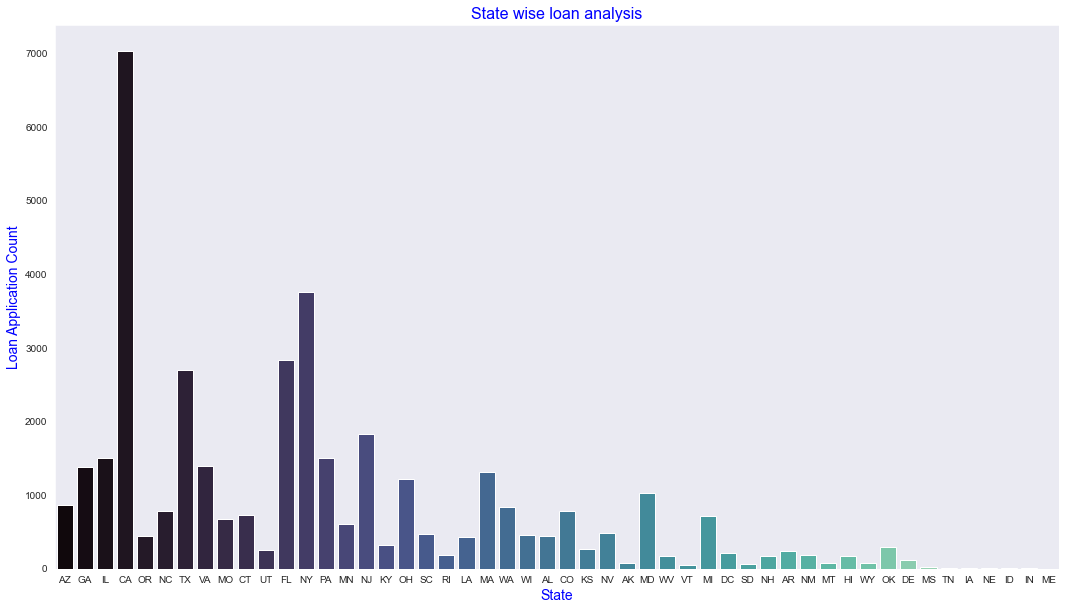

In [102]:
plt.figure(figsize=(18,10),facecolor= 'w')
sns.set_style("dark")
ax = sns.countplot(x="addr_state",data=loan,palette='mako')
ax.set_title('State wise loan analysis',fontsize=16,color='b')
ax.set_xlabel('State',fontsize=14,color = 'b')
plt.xticks(fontsize = 10) 
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')            
plt.show()

### Observations :
#### Plot shows that majority of loans given in state of California.
#### Second highest number of loan given state of New York.
#### Third highest number of loan given state of Florida.

## Year wise distribution of loans

In [103]:
# Checking laon issue year
loan['issue_year'].value_counts()

2011    21444
2010    11413
2009     4663
2008     1552
2007      247
Name: issue_year, dtype: int64

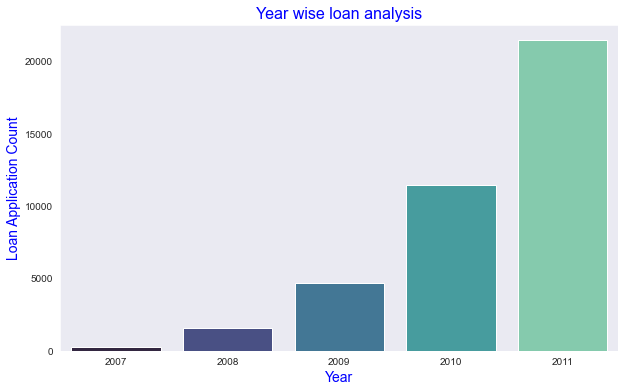

In [104]:
plt.figure(figsize=(10,6),facecolor= 'w')
sns.set_style("dark")
ax = sns.countplot(x="issue_year",data=loan,palette='mako')
ax.set_title('Year wise loan analysis',fontsize=16,color='b')
ax.set_xlabel('Year',fontsize=14,color = 'b')
plt.xticks(fontsize = 10) 
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')            
plt.show()

### Observations :
#### Most of the loans given in year of 2011.
#### Year wise loan applications are increasing that show lending club's business is increasing

## Month wise distribution of loans

In [105]:
# Checking laon issue year
loan['issue_month'].value_counts()

12    4392
11    4127
10    3878
9     3612
8     3492
7     3444
6     3245
5     2966
4     2812
3     2660
1     2354
2     2337
Name: issue_month, dtype: int64

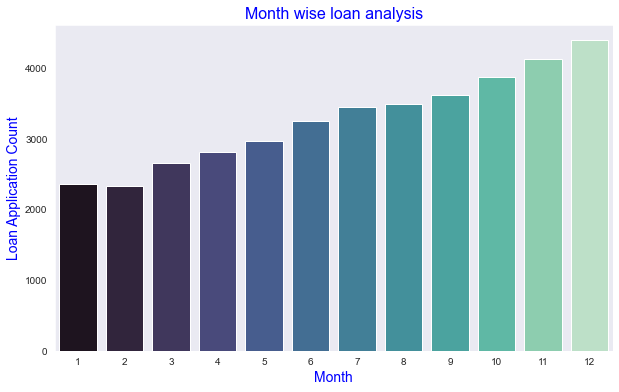

In [106]:
plt.figure(figsize=(10,6),facecolor= 'w')
sns.set_style("dark")
ax = sns.countplot(x="issue_month",data=loan,palette='mako')
ax.set_title('Month wise loan analysis',fontsize=16,color='b')
ax.set_xlabel('Month',fontsize=14,color = 'b')
plt.xticks(fontsize = 10) 
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')            
plt.show()

### Observations :
#### Most of the loans given in month of december.
#### Loan issued thourght year shows increasing pattern toward the year end.

##  Year and month wise distribution of loans

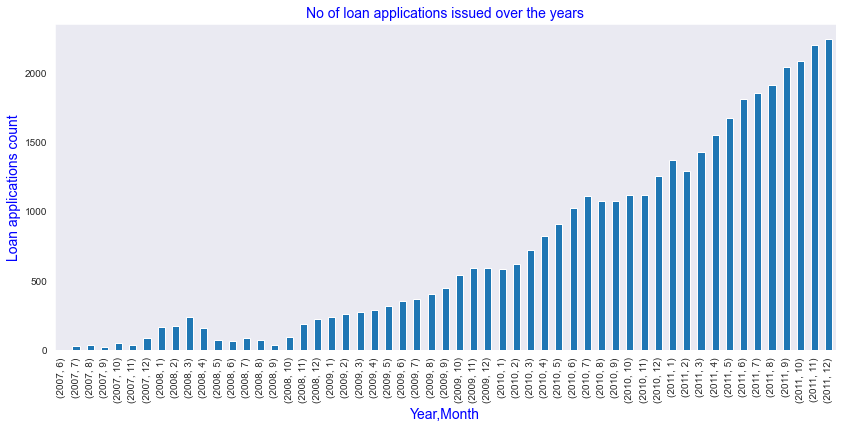

In [107]:
# Let us look into number of loans which were approved every year/month
plt.figure(figsize=(14,6),facecolor='w')
loan.groupby(['issue_year','issue_month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='b')
plt.xlabel('Year,Month',fontsize=14,color = 'b')      
plt.title("No of loan applications issued over the years",fontsize=14,color='b')
plt.show()

### Observations :
#### Count of loan application is increasing every passing year.
#### Number of loans issued in 2008( May-October) got dipped, may be due to Recession.

# Bivariate Analysis

In [108]:
# Lets check for the columns where we can do bivariate analysis
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month', 'loan_funded_cats',
       'annual_inc_cats', 'int_rate_cats', 'dti_cats'],
      dtype='object')

In [109]:
# loan_status is our target vaiable so most of the bivariate anlaysis will be with laon_status
# We will do following pair's bivariate anaysis
# loan_status vs purpose
# loan_status vs home_ownership
# loan_status vs term
# loan_status vs loan_funded_cats
# loan_status vs annual_inc_cats
# loan_status vs int_rate_cats
# loan_status vs dti_cats
# loan_status vs issue_year
# loan_status vs addr_state
# loan_status vs emp_length
# loan_status vs verification_status
# loan_status vs pub_rec_bankruptcies
# loan_status vs pub_rec
# loan_status vs pub_rec_bankruptcies
# loan_status vs pub_rec_bankruptcies
# loan_status vs pub_rec_bankruptcies
# purpose vs funded_amnt
# term vs int_rate
# purpose vs int_rate
# grade vs int_rate
# loan_funded_cats vs int_rate
# dti vs int_rate
# year vs int_rate
# recoveries vs annual_inc_cats
# annual_inc_cats vs grade


###  Loan Status vs Purpose

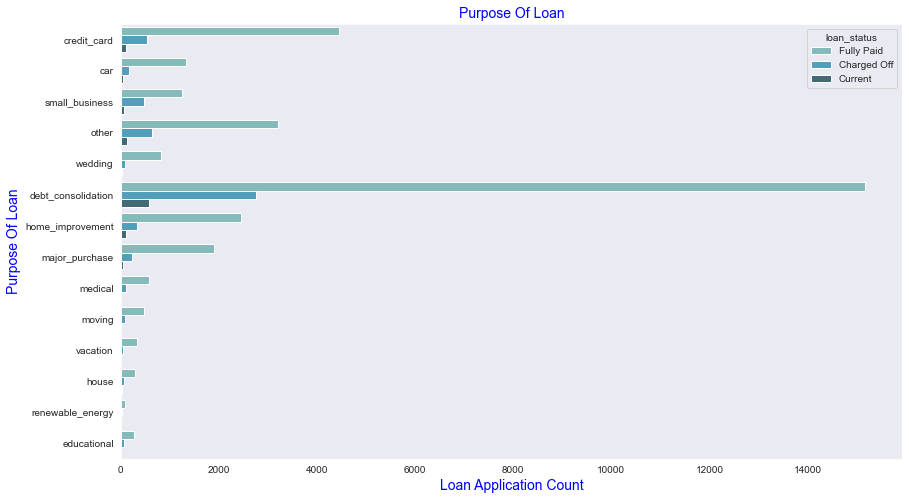

In [110]:
# Bivariate anlysis on Loan Status vs Purpose
plt.figure(figsize=(14,8),facecolor='w')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='b')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

### Observations :
#### Plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
#### Number of chraged off count also high too for these loans.

###  Loan Status vs Home Ownership

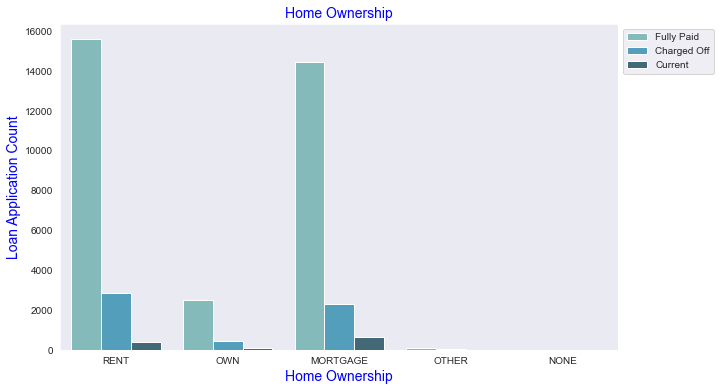

In [111]:
# Bivariate anlysis on Loan Status vs Home Ownership
plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='b')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()


### Observations :
#### Plot shows that most of them living in rented home or mortgazed their home.
#### Applicant numbers are high from these categories so charged off is high too

###  Loan Status vs Loan Term

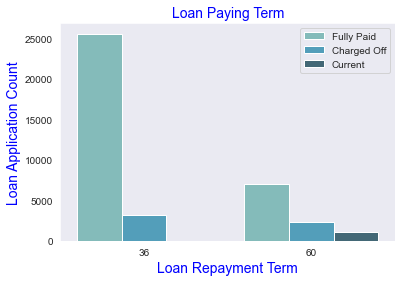

In [112]:
# Bivariate anlysis on Loan Status vs Loan Term
plt.figure(figsize=(6,4),facecolor='w')
ax = sns.countplot(x="term",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='b')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()



### Observations :
#### Plot shows that those who had taken loan to repay in 60 months had more chances of applicants getting  charged off as compared to applicants who had taken loan for 36 months.

###  Loan Status vs Funded Amount Categories


In [113]:
# Calculating Chargedoff Percentage for funded amounts
Funded_amnt_vs_loan = loan.groupby(['loan_funded_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
Funded_amnt_vs_loan['Total'] = Funded_amnt_vs_loan['Charged Off'] + Funded_amnt_vs_loan['Current'] + Funded_amnt_vs_loan['Fully Paid'] 
Funded_amnt_vs_loan['Chargedoff Perportion'] = round(Funded_amnt_vs_loan['Charged Off'] / Funded_amnt_vs_loan['Total'], 4)
Funded_amnt_vs_loan['Chargedoff Percent'] = round(Funded_amnt_vs_loan['Chargedoff Perportion']*100,2)
Funded_amnt_vs_loan.sort_values('Chargedoff Percent', ascending=False)

loan_status,loan_funded_cats,Charged Off,Current,Fully Paid,Total,Chargedoff Perportion,Chargedoff Percent
4,28000 +,209,104,705,1018,0.2053,20.53
3,21000-28000,465,180,1933,2578,0.1804,18.04
2,14000-21000,1171,354,5735,7260,0.1613,16.13
1,7000-14000,1823,326,11681,13830,0.1318,13.18
0,0-7000,1916,162,12555,14633,0.1309,13.09


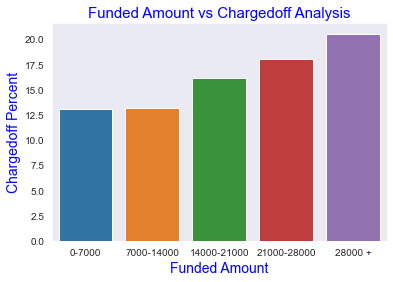

In [114]:
# Bivariate anlysis on Loan Status vs Funded Amount Category
fig, ax1 = plt.subplots(figsize=(6, 4),facecolor='w')
ax1.set_title('Funded Amount vs Chargedoff Analysis',fontsize=15,color = 'b')
ax1=sns.barplot(x='loan_funded_cats', y='Chargedoff Percent', data = Funded_amnt_vs_loan)
ax1.set_ylabel('Chargedoff Percent',fontsize=14,color = 'b')
ax1.set_xlabel('Funded Amount',fontsize=14,color='b')
plt.show()

### Observations:
#### Funded amount 28000+  has more chances of charged off.
#### Funded amount 0-14000 has less chances of charged off.
#### Notice that with increase in Funded amount, charged off proportion got Increased. 

###  Loan Status vs Annual Income Categories

In [115]:
# Calculating Chargedoff Percentage for Annual Income Categories
annual_inc_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
annual_inc_vs_loan['Total'] = annual_inc_vs_loan['Charged Off'] + annual_inc_vs_loan['Current'] + annual_inc_vs_loan['Fully Paid'] 
annual_inc_vs_loan['Chargedoff Perportion'] = round(annual_inc_vs_loan['Charged Off'] / annual_inc_vs_loan['Total'], 4)
annual_inc_vs_loan['Chargedoff Percent'] = round(annual_inc_vs_loan['Chargedoff Perportion']*100,2)
annual_inc_vs_loan.sort_values('Chargedoff Percent', ascending=False)

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff Perportion,Chargedoff Percent
0,0-20000,237,9,943,1189,0.1993,19.93
1,20000-40000,1514,170,7004,8688,0.1743,17.43
2,40000-60000,1729,345,9534,11608,0.1489,14.89
3,60000-80000,1024,240,6597,7861,0.1303,13.03
4,80000 +,1080,362,8531,9973,0.1083,10.83


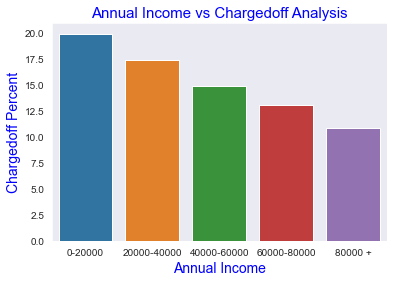

In [116]:
# Bivariate anlysis on Loan Status vs Annual Income Category.
fig, ax1 = plt.subplots(figsize=(6, 4),facecolor='w')
ax1.set_title('Annual Income vs Chargedoff Analysis', fontsize=15,color = 'b')
ax1=sns.barplot(x ='annual_inc_cats', y ='Chargedoff Percent', data = annual_inc_vs_loan)
ax1.set_ylabel('Chargedoff Percent', fontsize = 14, color = 'b')
ax1.set_xlabel('Annual Income', fontsize = 14, color = 'b')
plt.show()

### Observations:
#### Income range 80000+  has less chances of charged off.
#### Income range 0-20000 has high chances of charged off.
#### Notice that with increase in annual income charged off proportion got decreased. 

###  Loan Status vs Interest Rate Category

In [117]:
# Calculating Chargedoff Percentage for  Interest Rate Categories
int_rate_vs_loan = loan.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_rate_vs_loan['Total'] = int_rate_vs_loan['Charged Off'] + int_rate_vs_loan['Current'] + int_rate_vs_loan['Fully Paid'] 
int_rate_vs_loan['Chargedoff Perportion'] = round(int_rate_vs_loan['Charged Off'] / int_rate_vs_loan['Total'], 4)
int_rate_vs_loan['Chargedoff Percent'] = round(int_rate_vs_loan['Chargedoff Perportion']*100,2)
int_rate_vs_loan.sort_values('Chargedoff Percent', ascending=False)

loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,Chargedoff Perportion,Chargedoff Percent
3,16 +,1250,351,3317,4918,0.2542,25.42
2,12.5-16,1995,329,9354,11678,0.1708,17.08
1,10-13,1224,269,8083,9576,0.1278,12.78
0,0-10,825,77,11403,12305,0.0670,6.70


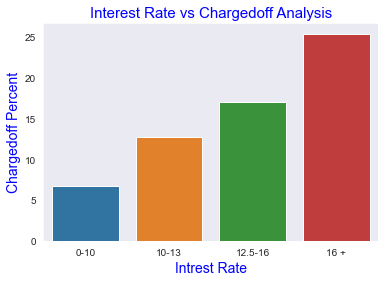

In [118]:
# Bivariate anlysis on Loan Status vs Annual Income Category.
fig, ax1 = plt.subplots(figsize=(6, 4),facecolor='w')
ax1.set_title('Interest Rate vs Chargedoff Analysis', fontsize=15,color = 'b')
ax1=sns.barplot(x ='int_rate_cats', y ='Chargedoff Percent', data = int_rate_vs_loan)
ax1.set_ylabel('Chargedoff Percent', fontsize = 14, color = 'b')
ax1.set_xlabel('Intrest Rate', fontsize = 14, color = 'b')
plt.show()

### Observations:
#### Plot shows with higher interest rate chances of being charged off increases


##  Loan Status vs Debt to Income Categories

In [119]:
# Calculating Chargedoff Percentage for  dti categories
dti_cats_vs_loan = loan.groupby(['dti_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_cats_vs_loan['Total'] = dti_cats_vs_loan['Charged Off'] + dti_cats_vs_loan['Current'] + dti_cats_vs_loan['Fully Paid'] 
dti_cats_vs_loan['Chargedoff Perportion'] = round(dti_cats_vs_loan['Charged Off'] / dti_cats_vs_loan['Total'], 4)
dti_cats_vs_loan['Chargedoff Percent'] = round(dti_cats_vs_loan['Chargedoff Perportion']*100,2)
dti_cats_vs_loan.sort_values('Chargedoff Percent', ascending=False)

loan_status,dti_cats,Charged Off,Current,Fully Paid,Total,Chargedoff Perportion,Chargedoff Percent
4,25+,1116,237,5455,6808,0.1639,16.39
3,15-20,1385,282,7400,9067,0.1528,15.28
2,10-15,1392,268,8165,9825,0.1417,14.17
1,05-10,996,191,6749,7936,0.1255,12.55
0,0-5,580,90,4157,4827,0.1202,12.02


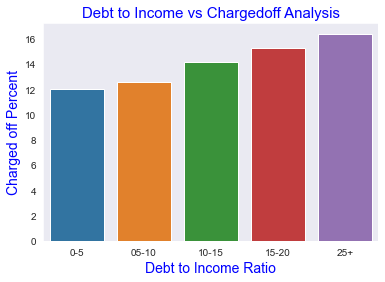

In [120]:
# Bivariate anlysis on Loan Status vs Annual Income Category.
fig, ax1 = plt.subplots(figsize=(6, 4),facecolor='w')
ax1.set_title('Debt to Income vs Chargedoff Analysis', fontsize=15,color = 'b')
ax1=sns.barplot(x ='dti_cats', y ='Chargedoff Percent', data = dti_cats_vs_loan)
ax1.set_ylabel('Charged off Percent', fontsize = 14, color = 'b')
ax1.set_xlabel('Debt to Income Ratio', fontsize = 14, color = 'b')
plt.show()

### Observations:
#### Plot clearly shows with increase in debt to income ratio chances of being charged off increases


##  Loan Status vs Issue_year

In [121]:
# Calculating year wise Chargedoff Percentage all the loan issued 
issue_year_vs_loan = loan.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off'] + issue_year_vs_loan['Current'] + issue_year_vs_loan['Fully Paid'] 
issue_year_vs_loan['Chargedoff Perportion'] = round(issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total'], 4)
issue_year_vs_loan['Chargedoff Percent'] = round(issue_year_vs_loan['Chargedoff Perportion']*100,2)
issue_year_vs_loan.sort_values('Chargedoff Percent', ascending=False)

loan_status,issue_year,Charged Off,Current,Fully Paid,Total,Chargedoff Perportion,Chargedoff Percent
0,2007,43.0,0.0,204.0,247.0,0.1741,17.41
1,2008,246.0,0.0,1306.0,1552.0,0.1585,15.85
4,2011,3239.0,1126.0,17079.0,21444.0,0.1510,15.10
3,2010,1466.0,0.0,9947.0,11413.0,0.1285,12.85
2,2009,590.0,0.0,4073.0,4663.0,0.1265,12.65


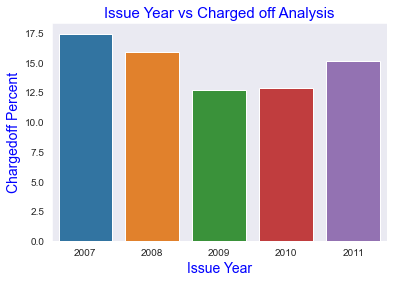

In [122]:
# Bivariate anlysis on Loan Status vs Issue Year.
fig, ax1 = plt.subplots(figsize=(6, 4),facecolor='w')
ax1.set_title('Issue Year vs Charged off Analysis', fontsize=15,color = 'b')
ax1=sns.barplot(x ='issue_year', y ='Chargedoff Percent', data = issue_year_vs_loan)
ax1.set_ylabel('Chargedoff Percent', fontsize = 14, color = 'b')
ax1.set_xlabel('Issue Year', fontsize = 14, color = 'b')
plt.show()

### Observations:
#### Plot clearly shows that loans issued in 2007 and 2008 had comparitively high charged off percentage.

##  Loan Status vs State

In [123]:
# Calculating state wise Chargedoff Percentage all the loan issued 
state_vs_loan = loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff Perportion'] = round(state_vs_loan['Charged Off'] / state_vs_loan['Total'], 4)
state_vs_loan['Chargedoff Percent'] = round(state_vs_loan['Chargedoff Perportion']*100,2)
state_vs_loan.sort_values('Chargedoff Percent', ascending=False).head()

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff Perportion,Chargedoff Percent
28,NE,3.0,0.0,2.0,5.0,0.6000,60.00
32,NV,107.0,17.0,368.0,492.0,0.2175,21.75
40,SD,12.0,2.0,50.0,64.0,0.1875,18.75
0,AK,14.0,2.0,63.0,79.0,0.1772,17.72
9,FL,497.0,85.0,2252.0,2834.0,0.1754,17.54


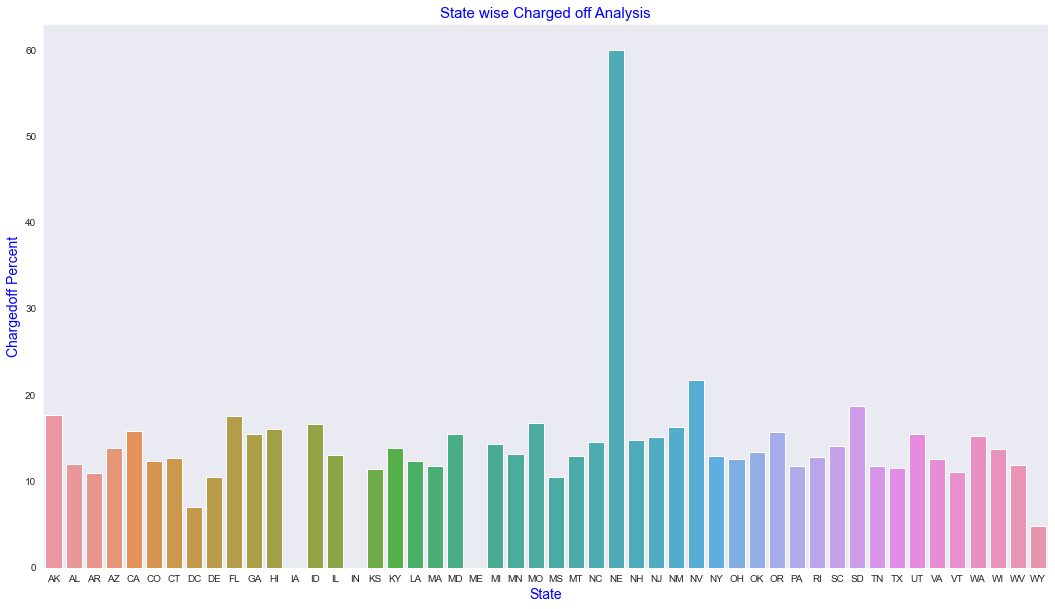

In [124]:
# Bivariate anlysis on Loan Status vs State.
fig, ax1 = plt.subplots(figsize=(18, 10),facecolor='w')
ax1.set_title('State wise Charged off Analysis', fontsize=15,color = 'b')
ax1=sns.barplot(x ='addr_state', y ='Chargedoff Percent', data = state_vs_loan)
ax1.set_ylabel('Chargedoff Percent', fontsize = 14, color = 'b')
ax1.set_xlabel('State', fontsize = 14, color = 'b')
plt.show()

### Observations:
#### Plot shows with state of Nebraska (NE) has high charged off percentage
#### This is because state of Nebraska has less number of loan and out of those 5 numbers 3 got chargedoff
#### We can not judge state of Nebraska with this analysis
#### NV,AK, SD and FL states shows good number of charged offs in good number of applications.


##  Loan Status vs Emp_length

In [125]:
# Bivariate Analysis on employment length against Chargedoff_Proportion
emplen_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff Precent'] = round(emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total'] *100, 2)
emplen_vs_loan.sort_values('Chargedoff Precent', ascending=False).head()

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff Precent
2,10,1316,386,7038,8740,15.06
8,7,262,62,1435,1759,14.89
1,1,455,69,2689,3213,14.16
6,5,456,87,2712,3255,14.01
0,0,635,74,3844,4553,13.95


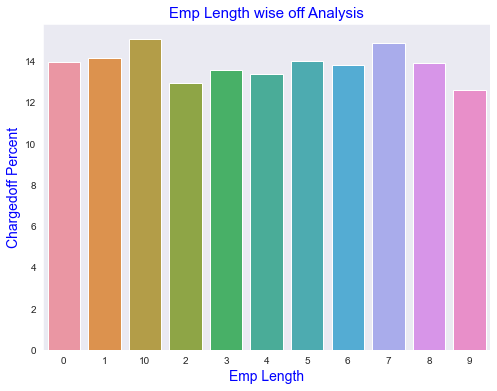

In [126]:
# Bivariate anlysis on Loan Status vs State.
fig, ax1 = plt.subplots(figsize=(8, 6),facecolor='w')
ax1.set_title('Emp Length wise off Analysis', fontsize=15,color = 'b')
ax1=sns.barplot(x ='emp_length', y ='Chargedoff Precent', data = emplen_vs_loan)
ax1.set_ylabel('Chargedoff Percent', fontsize = 14, color = 'b')
ax1.set_xlabel('Emp Length', fontsize = 14, color = 'b')
plt.show()

### Observations:
#### Nothing significant can be observed from this plot


##  Loan Status vs Verification Status

In [127]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Current'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff Percent'] = round(verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']*100, 2)
verfy_vs_loan.sort_values('Chargedoff Percent', ascending=False)


loan_status,verification_status,Charged Off,Current,Fully Paid,Total,Chargedoff Percent
2,Verified,2032,593,10000,12625,16.10
1,Source Verified,1422,306,8135,9863,14.42
0,Not Verified,2130,227,14474,16831,12.66


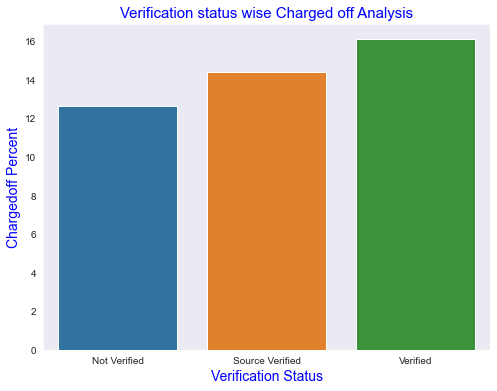

In [128]:
# Bivariate anlysis on Loan Status vs Verification Status.
fig, ax1 = plt.subplots(figsize=(8, 6),facecolor='w')
ax1.set_title('Verification status wise Charged off Analysis', fontsize=15,color = 'b')
ax1=sns.barplot(x ='verification_status', y ='Chargedoff Percent', data = verfy_vs_loan)
ax1.set_ylabel('Chargedoff Percent', fontsize = 14, color = 'b')
ax1.set_xlabel('Verification Status', fontsize = 14, color = 'b')
plt.show()

### Observations:
#### This analysis shows that verified loans have more chances to get charged off.
#### This analysis doesn't seem beneficial cause results are not convincing.

##  Loan Status vs Public Bankruptcies Record

In [129]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan = loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff Percent'] = round(bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']*100, 2)
bankruptcies_vs_loan.sort_values('Chargedoff Percent', ascending=False)


loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Chargedoff Percent
2,2.0,2.0,2.0,3.0,7.0,28.57
1,1.0,365.0,37.0,1268.0,1670.0,21.86
3,Not Known,116.0,0.0,572.0,688.0,16.86
0,0.0,5101.0,1087.0,30766.0,36954.0,13.80


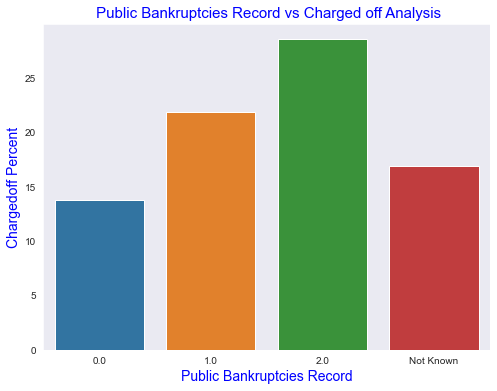

In [130]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

# Bivariate anlysis on Loan Status vs Public Bankruptcies Record.
fig, ax1 = plt.subplots(figsize=(8, 6),facecolor='w')
ax1.set_title(' Public Bankruptcies Record vs Charged off Analysis', fontsize=15,color = 'b')
ax1=sns.barplot(x ='pub_rec_bankruptcies', y ='Chargedoff Percent', data = bankruptcies_vs_loan)
ax1.set_ylabel('Chargedoff Percent', fontsize = 14, color = 'b')
ax1.set_xlabel('Public Bankruptcies Record', fontsize = 14, color = 'b')
plt.show()


### Observations:
#### Those who already have  Public Bankruptcies Record history have chargedoff chances higher than those who have no or  Public Bankruptcies Record.

##  Loan Status vs Derogatory Public Record

In [131]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

pub_rec_vs_loan = loan.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_vs_loan['Total']=pub_rec_vs_loan['Charged Off']+pub_rec_vs_loan['Current']+pub_rec_vs_loan['Fully Paid'] 
pub_rec_vs_loan['Chargedoff Percent'] = round(pub_rec_vs_loan['Charged Off'] / pub_rec_vs_loan['Total']*100,2)
pub_rec_vs_loan.sort_values('Chargedoff Percent', ascending=False)

loan_status,pub_rec,Charged Off,Current,Fully Paid,Total,Chargedoff Percent
1,1,454.0,43.0,1551.0,2048.0,22.17
2,2,10.0,3.0,37.0,50.0,20.00
0,0,5120.0,1080.0,31012.0,37212.0,13.76
3,3,0.0,0.0,7.0,7.0,0.00
4,4,0.0,0.0,2.0,2.0,0.00


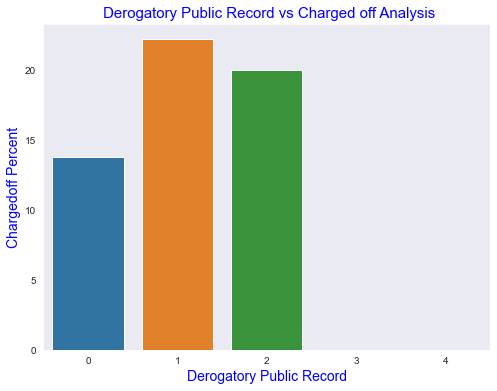

In [132]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion
fig, ax1 = plt.subplots(figsize=(8, 6),facecolor='w')
ax1.set_title(' Derogatory Public Record vs Charged off Analysis', fontsize=15,color = 'b')
ax1=sns.barplot(x ='pub_rec', y ='Chargedoff Percent', data = pub_rec_vs_loan)
ax1.set_ylabel('Chargedoff Percent', fontsize = 14, color = 'b')
ax1.set_xlabel('Derogatory Public Record', fontsize = 14, color = 'b')
plt.show()

### Observations:
#### Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.

##  Loan Status vs Employer Title


In [133]:
# Checking values in emp_title
loan.emp_title.value_counts()

N/A                              2417
US Army                           134
Bank of America                   109
IBM                                63
AT&T                               59
                                 ... 
Merck and Company Inc.              1
duncan tire co                      1
Bright House Networks               1
Florida Power & Light Company       1
Evergreen Center                    1
Name: emp_title, Length: 28582, dtype: int64

In [134]:
# Checking no of uniques in emp_title
loan.emp_title.describe()

count     39319
unique    28582
top         N/A
freq       2417
Name: emp_title, dtype: object

In [135]:
# creating dataframe of emp_title_value_counts
df_emp_title_value_counts = loan.emp_title.value_counts().sort_values(ascending = False).to_frame()
df_emp_title_value_counts

,emp_title
N/A,2417
US Army,134
Bank of America,109
IBM,63
AT&T,59
...,...
Bailard,1
American General Finance,1
HKS Inc.,1
Wilkes Barre Twp Police,1


In [136]:
# There are too many unique items in this variable
# So we can limit our analysis on those employer whose value counts is gearter than 20
# analysing loan status for less number of employer title can mislead our analysis
df_emp_title_more_than_20 = df_emp_title_value_counts[df_emp_title_value_counts['emp_title']>20]
df_emp_title_more_than_20.head()

,emp_title
N/A,2417
US Army,134
Bank of America,109
IBM,63
AT&T,59


In [137]:
#creating list of emp_titles whose value counts are more than 20
list_emp_title_more_than_20 = df_emp_title_more_than_20.index.to_list()
print(list_emp_title_more_than_20)

['N/A', 'US Army', 'Bank of America', 'IBM', 'AT&T', 'Kaiser Permanente', 'USAF', 'Wells Fargo', 'UPS', 'US Air Force', 'Walmart', 'Lockheed Martin', 'State of California', 'United States Air Force', 'U.S. Army', 'Self Employed', 'Verizon Wireless', 'US ARMY', 'USPS', 'Walgreens', 'JP Morgan Chase', 'JPMorgan Chase', 'Department of Defense', 'US Navy', 'Target', 'Northrop Grumman', 'Booz Allen Hamilton', 'United States Army', 'Verizon', 'Self', 'Best Buy', 'Comcast', 'us army', 'Accenture', 'United Parcel Service', 'Fidelity Investments', 'Home Depot', 'Social Security Administration', 'US Postal Service', 'United States Postal Service', 'Wells Fargo Bank', 'walmart', 'Morgan Stanley', 'self', 'General Electric', 'Raytheon', 'Sprint', 'Department of Homeland Security', 'American Express', 'Citigroup', 'Retired', 'Columbia University']


In [138]:
# Creating a dataframe which consist loan related data only for emp_titles whose value counts are more than 40
loan_emp_title_20 = loan[loan.emp_title.isin(list_emp_title_more_than_20)]
loan_emp_title_20.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month,loan_funded_cats,annual_inc_cats,int_rate_cats,dti_cats
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,2015-01-01,171.62,2016-05-01,0.0,2011,12,0-7000,20000-40000,10-13,NaN
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,2014-06-01,649.91,2016-05-01,0.0,2011,12,0-7000,0-20000,12.5-16,05-10
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,...,2012-04-01,152.39,2012-08-01,0.0,2011,12,0-7000,20000-40000,NaN,05-10
13,1069866,1304956,3000,3000,3000.0,36,9.91,96.68,B,B1,...,2015-01-01,102.43,2016-05-01,0.0,2011,12,0-7000,0-20000,0-10,10-15
23,1069700,1304810,10000,10000,10000.0,36,11.71,330.76,B,B3,...,2013-10-01,4942.63,2014-03-01,0.0,2011,12,7000-14000,40000-60000,10-13,15-20


In [139]:
# Deriving  dataframe that contain information related to charged off percentange with respect to various employer title
emp_title_vs_loan = loan_emp_title_20.groupby(['emp_title', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emp_title_vs_loan['Total'] = emp_title_vs_loan['Charged Off'] + emp_title_vs_loan['Current'] + emp_title_vs_loan['Fully Paid'] 
emp_title_vs_loan['Chargedoff Perportion'] = round(emp_title_vs_loan['Charged Off'] / emp_title_vs_loan['Total'], 4)
emp_title_vs_loan['Chargedoff Percent'] = round(emp_title_vs_loan['Chargedoff Perportion']*100,2)
emp_title_vs_loan.sort_values('Chargedoff Percent', ascending=False).head(10)

loan_status,emp_title,Charged Off,Current,Fully Paid,Total,Chargedoff Perportion,Chargedoff Percent
46,Walmart,14.0,0.0,31.0,45.0,0.3111,31.11
36,US Postal Service,7.0,1.0,18.0,26.0,0.2692,26.92
23,Retired,5.0,0.0,16.0,21.0,0.2381,23.81
27,Sprint,5.0,0.0,17.0,22.0,0.2273,22.73
31,UPS,12.0,1.0,40.0,53.0,0.2264,22.64
13,Home Depot,6.0,0.0,21.0,27.0,0.2222,22.22
49,self,5.0,0.0,18.0,23.0,0.2174,21.74
0,AT&T,12.0,2.0,45.0,59.0,0.2034,20.34
30,U.S. Army,8.0,1.0,31.0,40.0,0.2000,20.00
29,Target,7.0,0.0,28.0,35.0,0.2000,20.00


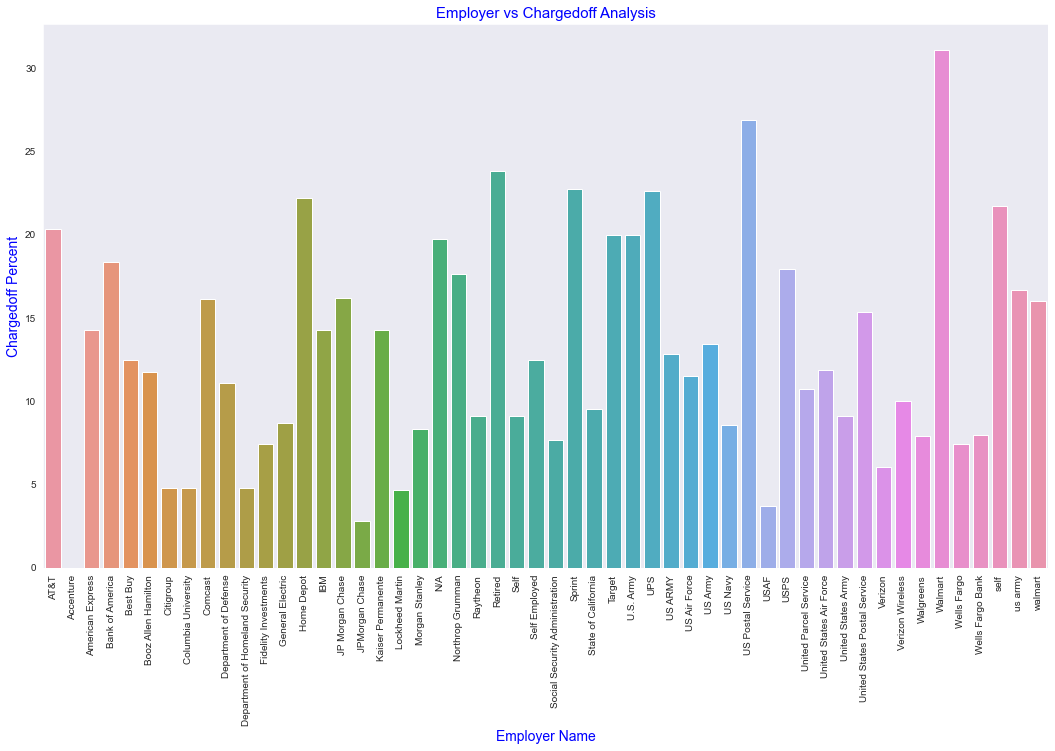

In [140]:
# Plotting bar plot of charged off percentange with respect to various employer title.
fig, ax1 = plt.subplots(figsize=(18, 10),facecolor='w')
ax1.set_title('Employer vs Chargedoff Analysis', fontsize=15,color = 'b')
ax1=sns.barplot(x ='emp_title', y ='Chargedoff Percent', data = emp_title_vs_loan)
ax1.set_ylabel('Chargedoff Percent', fontsize = 14, color = 'b')
ax1.set_xlabel('Employer Name', fontsize = 14, color = 'b')
plt.xticks(rotation = 90)
plt.show()

### Observations:
#### Borrower Working in Accenture shows less chances for default
#### Borrower Working in Walmart, US Postal Services, Retired etc shows comparitively high chances for default

##  Purpose of loan vs Funded Amount

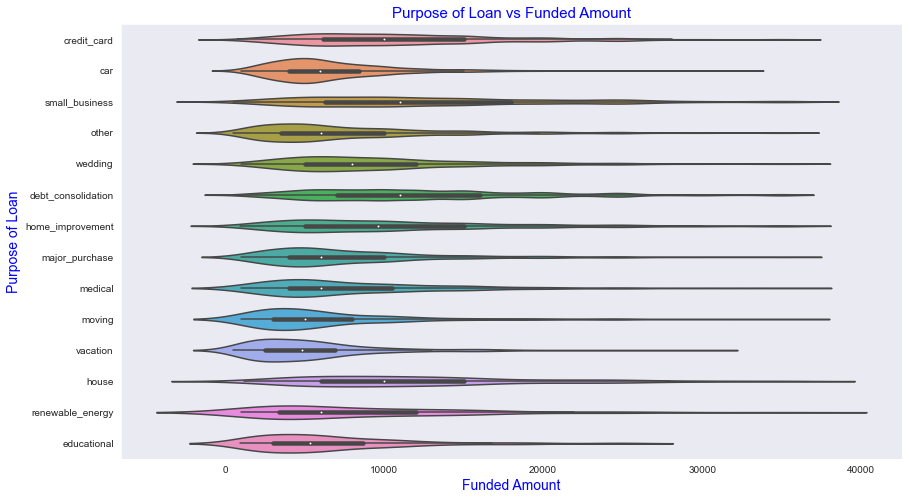

In [141]:
# Bivariate Analysis - Puprose of loan vs Funded Amount
# violin Plot - It shows the distribution of quantitative data across several levels of one (or more) categorical variables 
# such that those distributions can be compared. 

plt.figure(figsize=(14,8),facecolor='w')
ax=sns.violinplot(y='purpose', x='funded_amnt', data =loan)
ax.set_title('Purpose of Loan vs Funded Amount',fontsize=15,color='b')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Funded Amount',fontsize=14,color = 'b')
plt.show()



### Observations:
#### Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed as compare to loan taken for other purposes.
#### Car and vacation loans are mostly lower amount of loan.


##  Purpose of loan vs Interest Rate

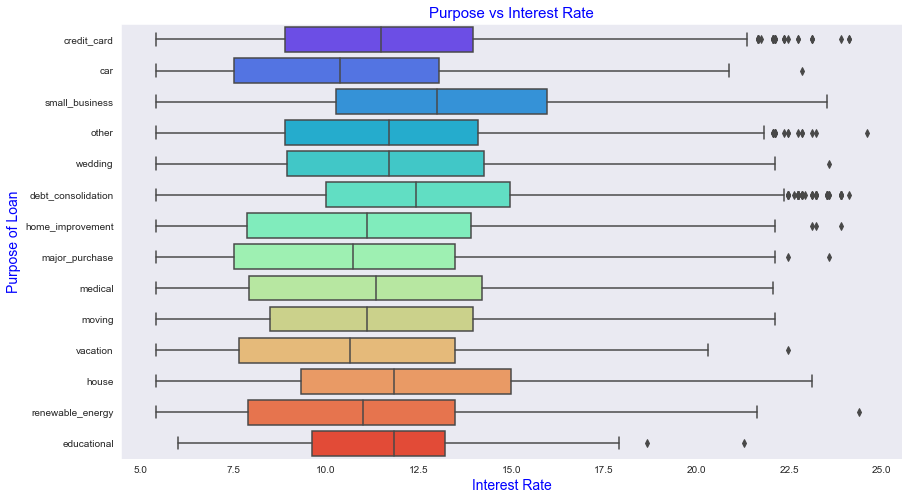

In [142]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot
plt.figure(figsize=(14,8),facecolor='w')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='b')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'b')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'b')
plt.show()



### Observations:
#### It is clear that avearge intrest rate is highest for small business purpose.
#### Debt consolidation is 2nd where borrowers had to pay more interest rate.

##  Grade vs Interest Rate

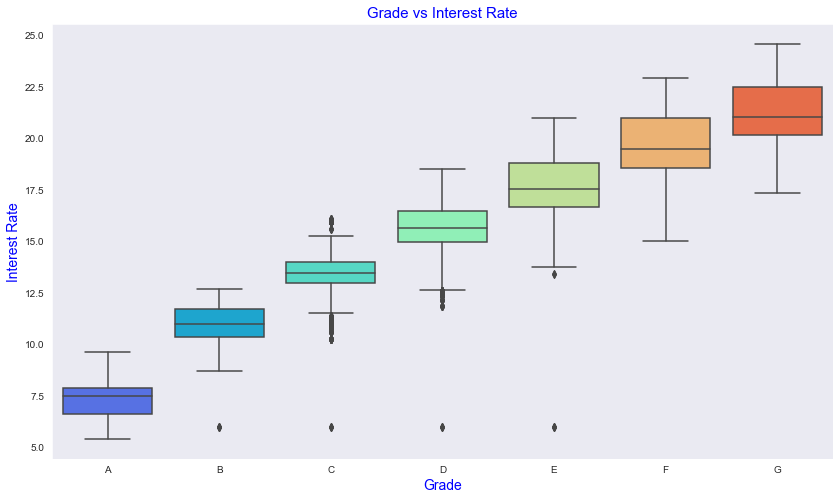

In [143]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='w')
ax = sns.boxplot(y='int_rate', x='grade', data =loan,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Grade',fontsize=14,color = 'b')
plt.show()

### Observations:
#### The better the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
#### It is clear that intrest rate is increasing with grades moving from A to F.

## Funded Amount vs Interest Rate

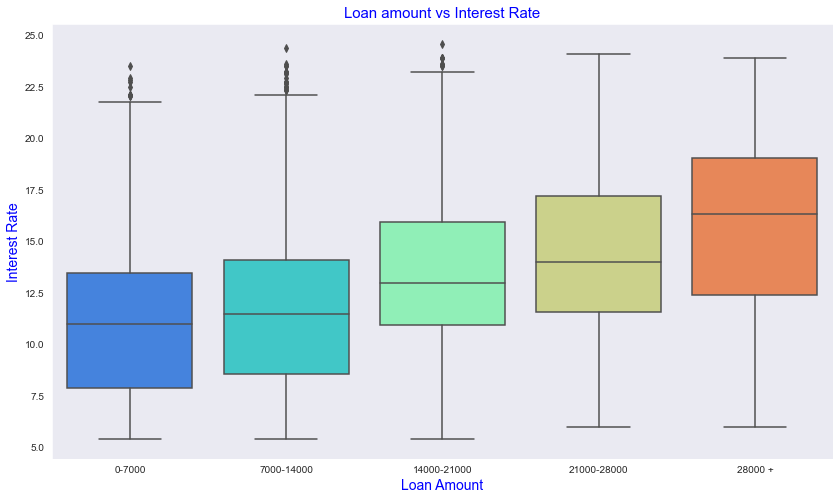

In [144]:
# Bivariate Analysis - Funded Amount  vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='w')
ax = sns.boxplot(y='int_rate', x='loan_funded_cats', data =loan,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()

### Observations:
#### It is clear that intrest rate is increasing with increase in funded amount.

## Debt to Income vs Interest Rate

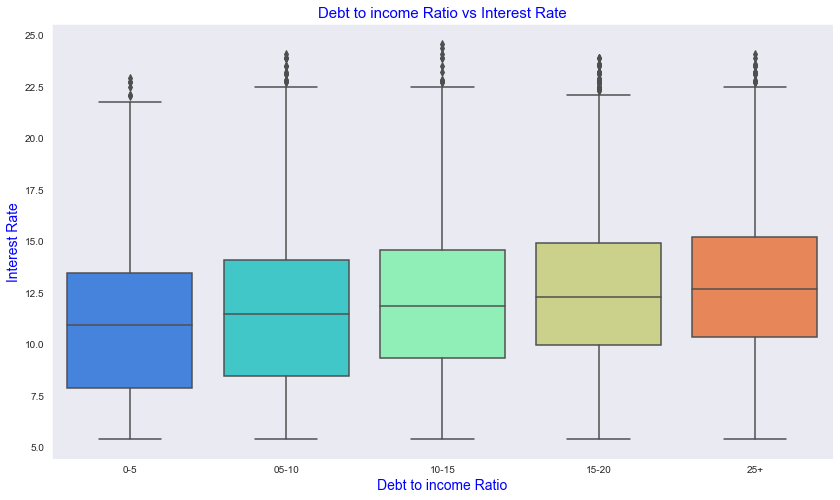

In [145]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='w')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =loan,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'b')
plt.show()

### Observations:
#### If your DTI is low enough you may get a lower interest rate.
#### Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

## Loan Issue Year vs Interest Rate

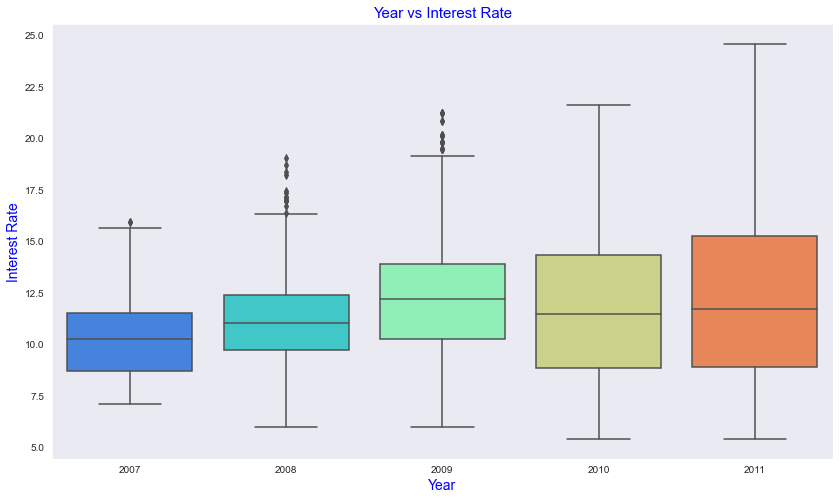

In [146]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='w')
ax = sns.boxplot(y='int_rate', x='issue_year', data =loan,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Year',fontsize=14,color = 'b')
plt.show()



### Observations:
#### Lending club had given loan at most varying interest rates to borrower in year 2011.
#### From 2008 to 2011 Lending club had been consistently increasing range of interest rates offered to borrowers.

## Multivariate Ananlysis

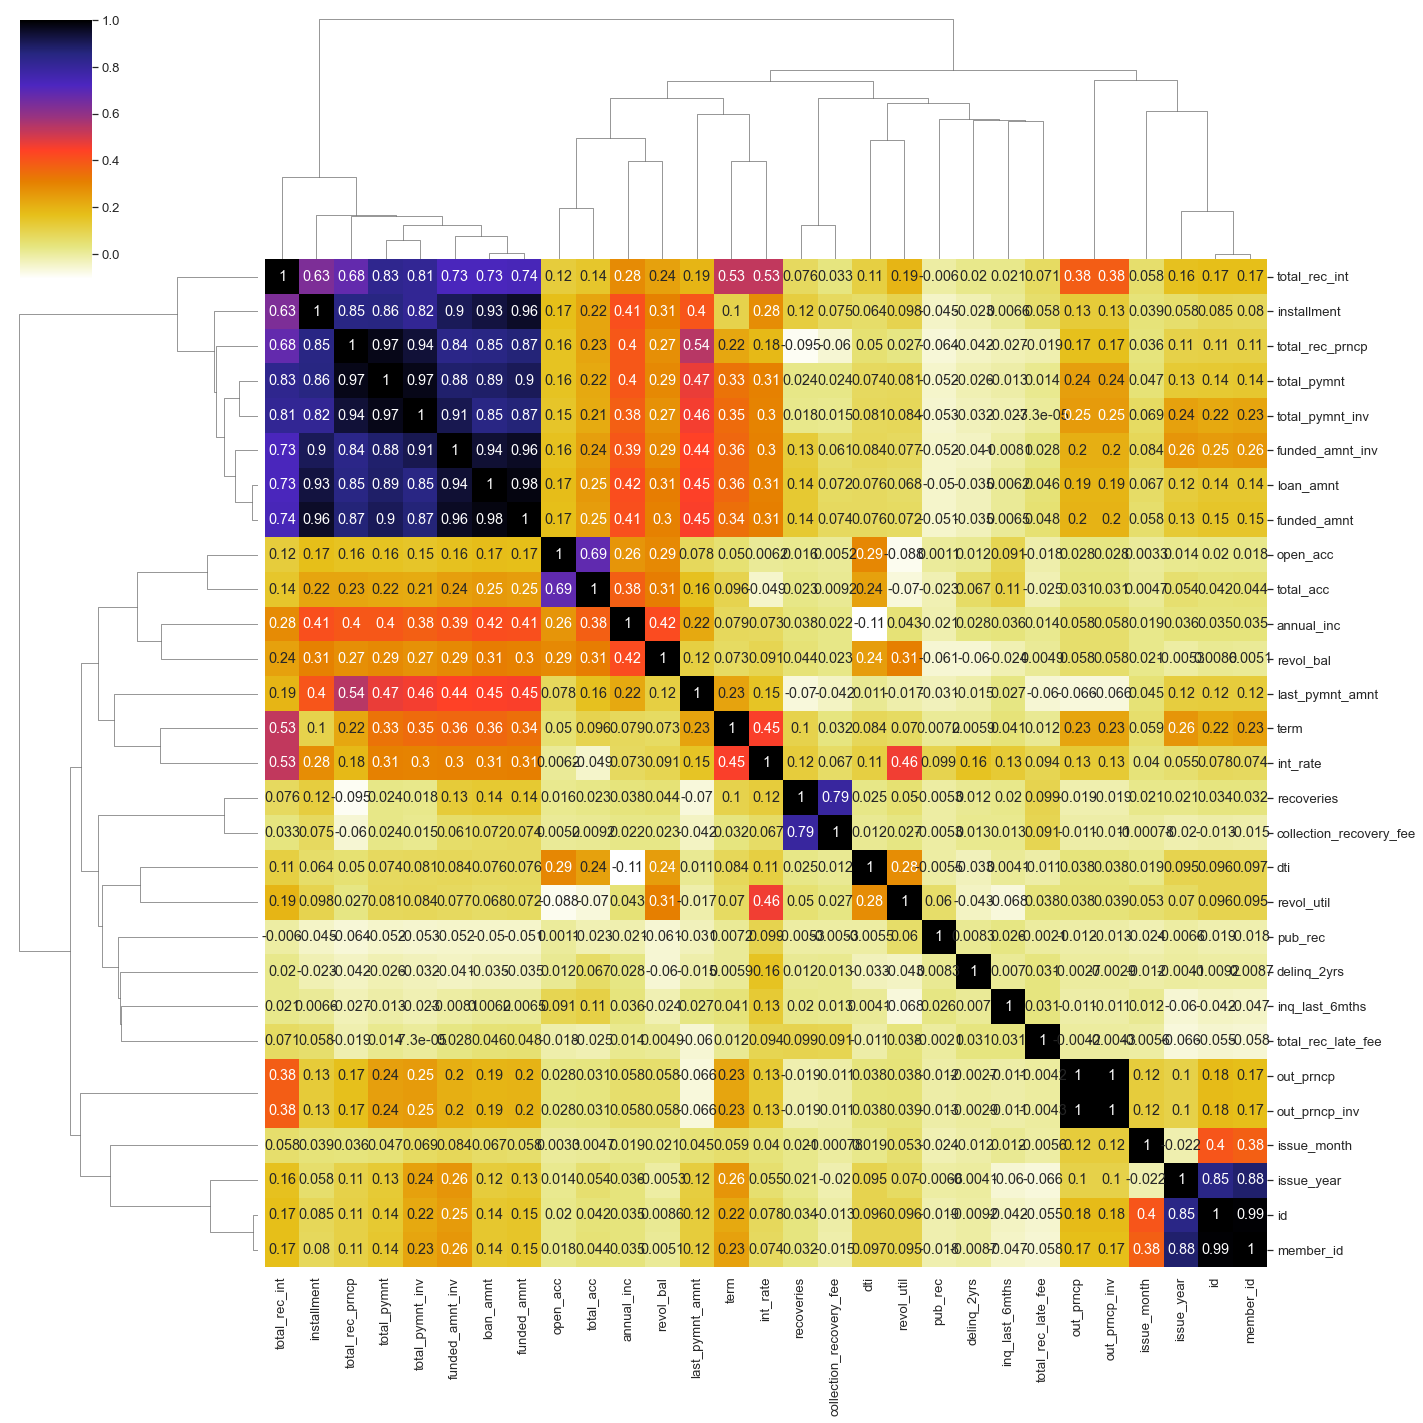

In [147]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.
loan_correlation = loan.corr()
sns.set(font_scale=1.2)
sns.clustermap(loan_correlation,annot=True,figsize=(20, 20),cmap='CMRmap_r')
plt.show()

### Observation
#### Loan amount, investor amount, funding amount are strongly correlated.
#### Annual income with DTI (Debt-to-income ratio) is negatively correalted.